# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Create a dataset

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

In [3]:
X.shape, y.shape

((100, 1), (100,))

# Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

# Linear Regression (OLS)

## Scatter plot - X vs y

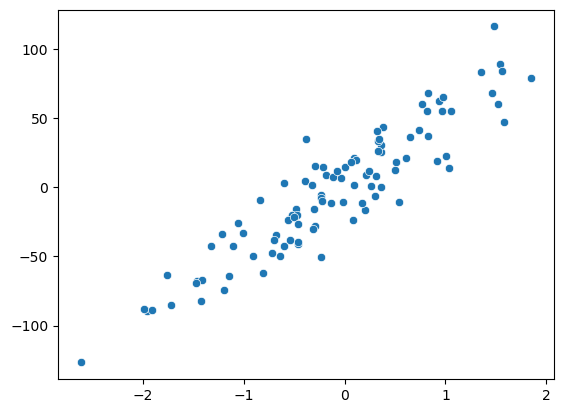

In [6]:
sns.scatterplot(x=X[:, 0], y=y);

## Fit the model

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

## Prediction on test data and R2 Score

In [9]:
y_pred = lr.predict(X_test)

In [10]:
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.878164919219213


## Slope and Intercept

In [11]:
print('Slope: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Slope:  [46.56592693]
Intercept:  2.2713664531535667


# Gradient Descent Class

In [13]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -100
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            
            # Intercept (b)
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)            
            self.b = self.b - (self.lr * loss_slope_b)

            # Slope (m)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * (X.ravel()))
            self.m = self.m - (self.lr * loss_slope_m)
        
        print('Slope: ', self.m)
        print('Intercept: ', self.b)
        
    def predict(self,X):
        return self.m * X + self.b

## Fit the GD

In [14]:
gd = GDRegressor(0.001, 30)

In [15]:
gd.fit(X, y)

Slope:  47.238169109052315
Intercept:  2.263943552848715


* The slope and intercept calculated by Gradient Descent are almost equal to the ones calculated by OLS.

## Prediction on test data and R2 Score

In [16]:
y_pred = gd.predict(X_test)

In [17]:
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.8795062152260094


* R2 Score is equal.